<center><span style="color:gray";><h1><b>Commute and Intersections Metrics</b></h1></span></center>


I created multiple indicators which I used to rank the neighborhoods by using:
<ul style="padding-left: 40px;">
    <li>The population per neighborhood</li>
    <br>
    <li>The amount of intersections per neighborhood</li>
    <br>
    <li>The street density and miles of road per neighborhood</li>
    <br>
    <li>The % of people who commute alone by car per neighborhood</li>
    <br>
    <li>The % of people who Carpool/Vanpool per neighborhood</li>
    <br>
    <li>The % of people who commute via motorcycle per neighborhood</li>
    <br>
    <li>The % of people who commute via public transportation per neighborhood</li>
    <br>
    <li>The % of people who commute via taxi per neighborhood</li>
    <br>
    <li>The % of people who commute via bicycle per neighborhood</li>
    <br>
    <li>The % of people who commute by walking per neighborhood</li>
</ul>

I calculated the P value of each plot to ensure that each indicator is statistically significant (P < 0.05).
The P-value measures the probability of obtaining the given results under the null hypothesis.

The sections below generate 2 graphs. The first graph depicts street density vs percent of Motor and Non-Motor commutes.

The second graph depicts intersections per neighborhood vs percent of Motor and Non-Motor commutes.

Both graphs display a linear regression and the P values of each scatter plot.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

useful_data = pd.read_csv('Useful_Data.csv') #Loads the data and cleans it up
useful_data.dropna(subset=[
    'Density (st. mi/area mi^2)', 'Intersection Count', 'Commute to Work: Bicycle (2010)', 'Commute to Work: Walk (2010)',
    'Commute to Work: Motorcycle (2010)', 'Commute to Work: Carpool/Vanpool (2010)', 
    'Commute to Work: Public Transportation (2010)', 'Drive Alone (2010)'
], inplace=True)

#Summing up the percentage of people commuting by non-motor and motor methods
non_motor_commuters = useful_data['Commute to Work: Bicycle (2010)'] + useful_data['Commute to Work: Walk (2010)']
motor_commuters = useful_data[['Commute to Work: Taxi (2010)', 'Commute to Work: Motorcycle (2010)', 
                               'Commute to Work: Carpool/Vanpool (2010)', 'Commute to Work: Public Transportation (2010)', 
                               'Drive Alone (2010)']].sum(axis=1)

density = useful_data['Density (st. mi/area mi^2)'] #The first plot looks at commuters vs. density
non_motor_fit = stats.linregress(density, non_motor_commuters) #Calculates line of best fit for non-motor commuters vs density
motor_fit = stats.linregress(density, motor_commuters) #Calculates line of best fit for motor commuters vs density

intersections = useful_data['Intersection Count'] #The second plot looks at commuters vs. intersection count
non_motor_fit_intersections = stats.linregress(intersections, non_motor_commuters) #Calculates line of best fit for non-motor commuters vs intersections
motor_fit_intersections = stats.linregress(intersections, motor_commuters) #Calculates line of best fit for motor commuters vs intersections

Motor commute means the cummaltive percentages of people who commute to work via:
<ul style="padding-left: 40px;">
    <li>car (alone) per neighborhood</li>
    <li>Carpool/Vanpool per neighborhood</li>
    <li>Motorcycle per neighborhood</li>
    <li>Public transportation per neighborhood</li>
    <li>Taxi per neighborhood</li>
</ul>

Non-Motor commutes means the percent of people who bike to work plus those who walk to work.

The section below configures the labels' text, color, and locations, adjusts the scale of the axis, and ensures grid lines are present.

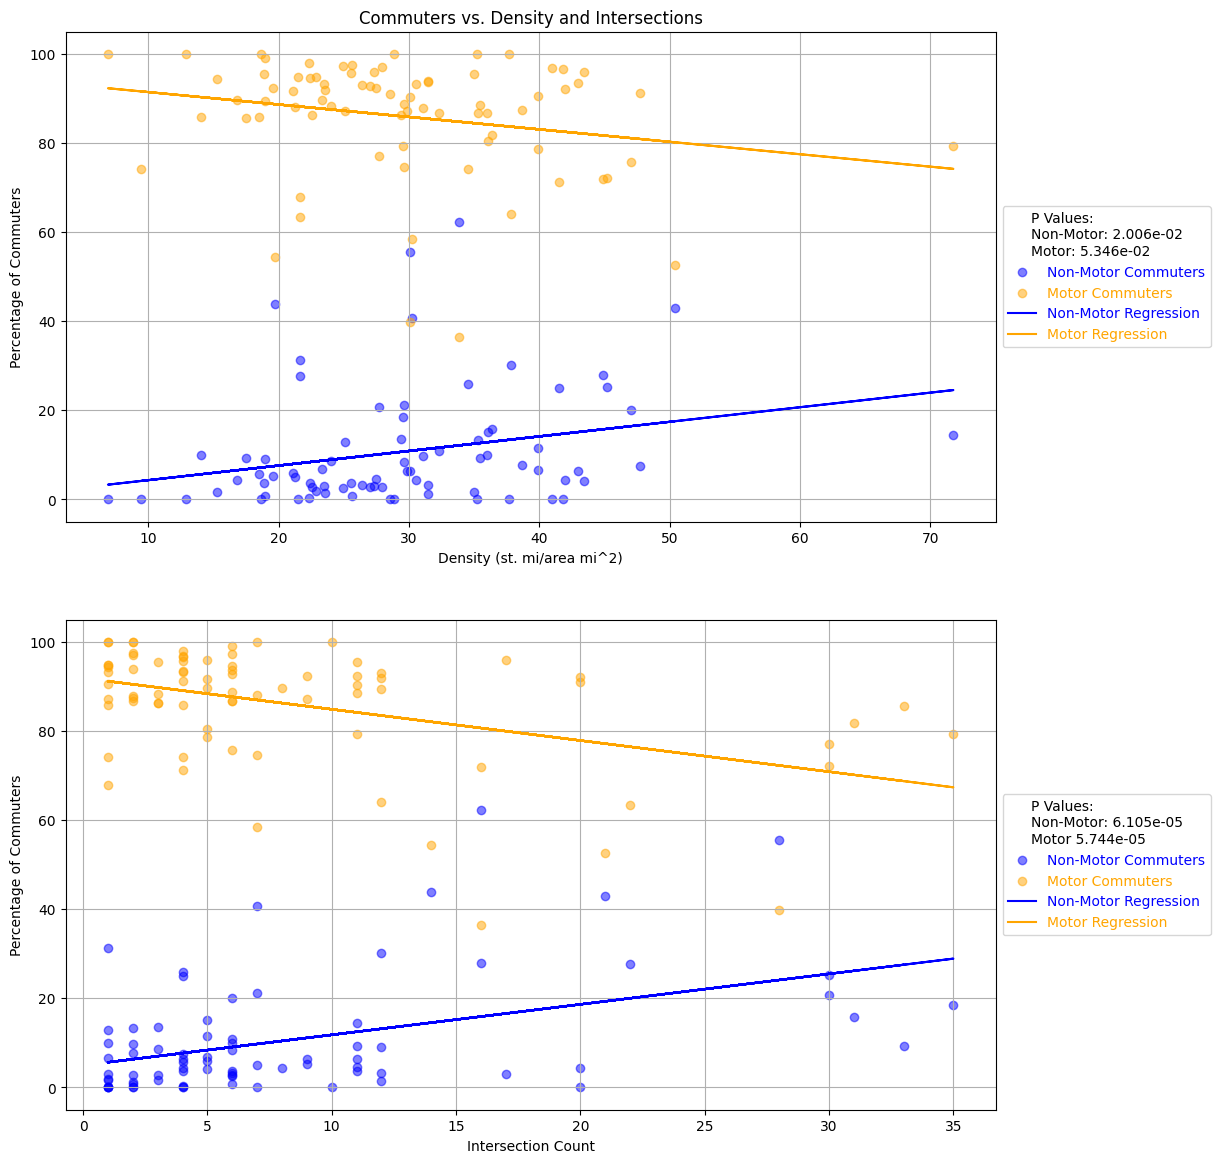

In [2]:
fig, ax = plt.subplots(2, 1, figsize=(12, 14)) #Visualizes the data

#Plot and regression lines for the first graph
ax[0].scatter(density, 100*non_motor_commuters, alpha=0.5, color='blue', label='Non-Motor Commuters') #Multiplies by 100 to display as a percent
ax[0].scatter(density, 100*motor_commuters, alpha=0.5, color='orange', label='Motor Commuters') #Multiplies by 100 to display as a percent
ax[0].plot(density, 100*(non_motor_fit.intercept + non_motor_fit.slope*density), 'blue', label='Non-Motor Regression') #Multiplies by 100 to match scatter plot
ax[0].plot(density, 100*(motor_fit.intercept + motor_fit.slope*density), 'orange', label='Motor Regression') #Multiplies by 100 to match scatter plot

#Setting the first graph's titles and labels
ax[0].set_title('Commuters vs. Density and Intersections')
ax[0].set_xlabel('Density (st. mi/area mi^2)')
ax[0].set_ylabel('Percentage of Commuters')

#Plot and regression lines for the second graph
ax[1].scatter(intersections, 100*non_motor_commuters, alpha=0.5, color='blue', label='Non-Motor Commuters')
ax[1].scatter(intersections, 100*motor_commuters, alpha=0.5, color='orange', label='Motor Commuters')
ax[1].plot(intersections, 100*(non_motor_fit_intersections.intercept + non_motor_fit_intersections.slope*intersections), 'blue', label='Non-Motor Regression')
ax[1].plot(intersections, 100*(motor_fit_intersections.intercept + motor_fit_intersections.slope*intersections), 'orange', label='Motor Regression')

#Setting the second graph's titles and labels
ax[1].set_xlabel('Intersection Count')
ax[1].set_ylabel('Percentage of Commuters')

#Calculates P values for the regression lines
non_motor_p_value_density = f'{non_motor_fit.pvalue:.3e}'
motor_p_value_density = f'{motor_fit.pvalue:.3e}'
non_motor_p_value_intersections = f'{non_motor_fit_intersections.pvalue:.3e}'
motor_p_value_intersections = f'{motor_fit_intersections.pvalue:.3e}'

legend_0 = ax[0].legend(title=f"P Values:\nNon-Motor: {non_motor_p_value_density}\nMotor: {motor_p_value_density}", loc='center left', bbox_to_anchor=(1, 0.5)) #Displaying P Values
legend_1 = ax[1].legend(title=f"P Values:\nNon-Motor: {non_motor_p_value_intersections}\nMotor {motor_p_value_intersections}", loc='center left', bbox_to_anchor=(1, 0.5))

#Modify the text color of the legend
for text in legend_0.get_texts():
    if "Non-Motor" in text.get_text():
        text.set_color('blue')
    elif "Motor" in text.get_text():
        text.set_color('orange')

for text in legend_1.get_texts():
    if "Non-Motor" in text.get_text():
        text.set_color('blue')
    elif "Motor" in text.get_text():
        text.set_color('orange')

#Ensures the grid lines are visisble
ax[0].grid(True)
ax[1].grid(True)


The graphs above show that the percentage of Motor Commuters per neighborhood correlate negatively to intersection counts and street densities.
At the same time, the percentage of Non-Motor commuters increases.
One possible explanation for this is that intersections provide pedestrians a place to cross safely, as cars must stop at lights and stop signs.
Decreased street density may correlate with less pedestrians as streets tend to be build with sidewalks, so low street densities might mean there's less sidewalks in a neighborhood.

The graph below depicts population density vs percentage of commuters.

The population density was calculated by using the formula Population_Density=[Population (2010)]/1000/([Total Street Miles]/[Density (st. mi/area mi^2)]).

When the units from the formula cancel out, we are left with population density. The density is being shown as 1000 people/mile².

In [3]:
#Loads the dataset from 'Useful_Data.csv'
useful_data = pd.read_csv('Useful_Data.csv')

#Removes rows with NaN values
useful_data.dropna(subset=[
    'Population (2010)', 'Total Street Miles', 'Density (st. mi/area mi^2)', 'Drive Alone (2010)', 'Commute to Work: Carpool/Vanpool (2010)', 
    'Commute to Work: Motorcycle (2010)', 'Commute to Work: Public Transportation (2010)', 'Commute to Work: Taxi (2010)'], inplace=True)

#Calculating x as [Population (2010)]/1000/([Total Street Miles]/[Density (st. mi/area mi^2)])
x = (useful_data['Population (2010)']/1000) / (useful_data['Total Street Miles'] / useful_data['Density (st. mi/area mi^2)'])

#Calculating y as the cummulative percentage of Motor Commuters
y = (useful_data['Drive Alone (2010)'] + useful_data['Commute to Work: Carpool/Vanpool (2010)'] + useful_data['Commute to Work: Motorcycle (2010)'] +
     useful_data['Commute to Work: Public Transportation (2010)'] + useful_data['Commute to Work: Taxi (2010)'])

With the street density statistics I was able to calculate the area of each neighborhood. I divided population by area to get Population density.

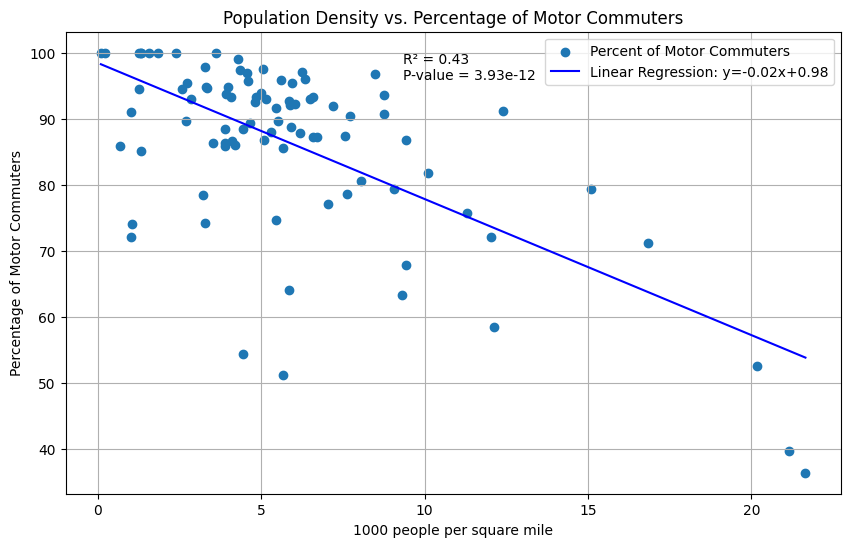

In [4]:
slope, intercept, rvalue, p_value, std_err = stats.linregress(x, y)

#Scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(x, 100*y, label='Percent of Motor Commuters') #Multiplied by 100 because its a percentage
plt.title('Population Density vs. Percentage of Motor Commuters')
plt.xlabel('1000 people per square mile') #The shown population density is shown as thousands per square mile
plt.ylabel('Percentage of Motor Commuters')

#Calculates linear regression
x_range = np.linspace(min(x), max(x), 100)
plt.plot(x_range, 100*(intercept + slope*x_range), 'blue', label=f'Linear Regression: y={slope:.2f}x+{intercept:.2f}')

#Includes R² and P values for the linear model
plt.annotate(f'R² = {rvalue**2:.2f}\nP-value = {p_value:.2e}', xy=(0.435, 0.9555), xycoords='axes fraction', fontsize=10, verticalalignment='top')

plt.legend()
plt.grid(True)
plt.show()


In the sections below, we will visualize the ratio of intersections per miles of road (intersection ratio) vs Motor Vehicle Commuters.

In [5]:
#Loads the dataset from Useful_Data.csv
useful_data = pd.read_csv('Useful_Data.csv')

#Removing rows with NaN values
useful_data.dropna(subset=[
    'Intersection Count', 'Miles of Major Roads', 'Total Street Miles',
    'Drive Alone (2010)', 'Commute to Work: Carpool/Vanpool (2010)',
    'Commute to Work: Motorcycle (2010)', 'Commute to Work: Taxi (2010)'
], inplace=True)

y = (useful_data['Commute to Work: Taxi (2010)'] + useful_data['Commute to Work: Motorcycle (2010)'] +
     useful_data['Commute to Work: Carpool/Vanpool (2010)'] + useful_data['Drive Alone (2010)'])

#Update x to be the ratio of Intersection Count to the sum of'Miles of Major Roads and Total Street Miles
x = useful_data['Intersection Count'] / (useful_data['Miles of Major Roads'] + useful_data['Total Street Miles'])

# Calculate the linear regression on the data
slope, intercept, rvalue, p_value, std_err = stats.linregress(x, y)


Once again we will calculate a linear regression and display the R^2 and P value.

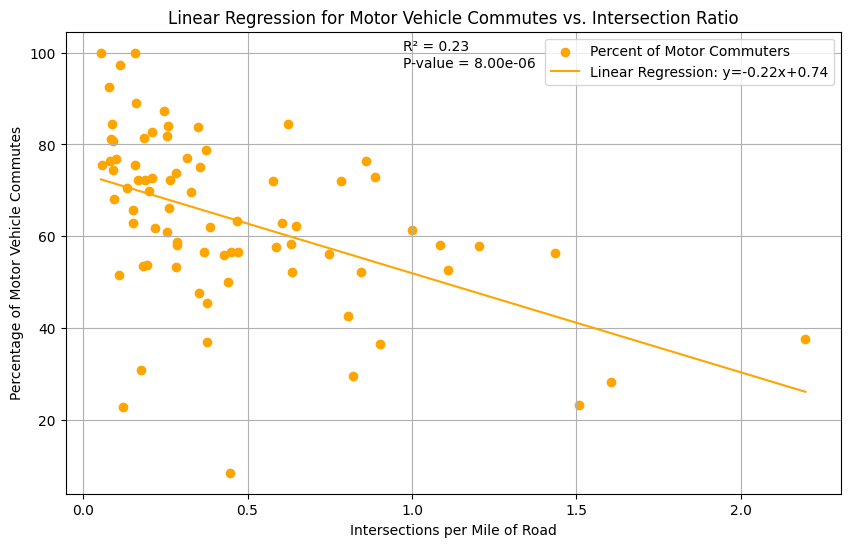

In [6]:
#Creates a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, 100*y, color='orange', label='Percent of Motor Commuters')  # Color added here as well for consistency
plt.title('Linear Regression for Motor Vehicle Commutes vs. Intersection Ratio')
plt.xlabel('Intersections per Mile of Road')
plt.ylabel('Percentage of Motor Vehicle Commutes')

#Adds linear trend
x_range = np.linspace(min(x), max(x), 100)
plt.plot(x_range, 100*(intercept + slope*x_range), 'orange', label=f'Linear Regression: y={slope:.2f}x+{intercept:.2f}')  # Color changed to green

#Annotates with R² and P value
plt.annotate(f'R² = {rvalue**2:.2f}\nP-value = {p_value:.2e}',
             xy=(0.435, 0.9825), xycoords='axes fraction',
             fontsize=10, verticalalignment='top')

plt.legend()
plt.grid(True)
plt.show()

In [7]:
file_path = "Useful_Data.csv"
df = pd.read_csv(file_path)

df #Ranks neighborhoods based on each metric, the lower the final score the more walkable a neighborhood is
df['Intersection_Count'] = df['Intersection Count'] #Intersections per neighborhood
df['Intersection_Rank']=df['Intersection_Count'].rank(method='min', ascending=False) #Neighborhoods ranked by intersection count
df['Street_Density_Rank'] = df['Density (st. mi/area mi^2)'].rank(method='min', ascending=False) #Neighborhoods ranked by street density
df['Carpool_Vanpool'] = df['Commute to Work: Carpool/Vanpool (2010)'] #Percent that carpool
df['Motorcycle'] = df['Commute to Work: Motorcycle (2010)'] #Percent that use motorcycles
df['Rank_Car_Van'] = (df['Drive Alone (2010)']+df['Commute to Work: Carpool/Vanpool (2010)']+df['Motorcycle']).rank(method='min', ascending=True) #Carpooling ranked
df['Intersection_Ratio_Rank']=(df['Intersection Count'] / (df['Miles of Major Roads'] + df['Total Street Miles'])).rank(method='min', ascending=False) #Intersections per miles of road ranked
df['Population_Density_Rank'] = (df['Population (2010)'] / (df['Total Street Miles'] / df['Density (st. mi/area mi^2)'])).rank(method='min', ascending=False) #Population density ranked
df['Public_Transportation_Rank'] = df['Commute to Work: Public Transportation (2010)'].rank(method='min', ascending=True) #Neighborhoods ranked by public transit
df['Bicycle_Rank'] = df['Commute to Work: Bicycle (2010)'].rank(method='min', ascending=False) #Neighborhoods ranked by bicycles

The final rank is determined using the combined metrics of intersections count, street density, use of public transportation, intersections per mile of road, use of bicycles, and population density.
The ranks are added together such that the most walkable neighborhood has the lowest score.
Shown below is the table with the ranks.

In [8]:
# Calculate the eighth ranking by summing up all ranks and name it 'total_rank'
df['Total_rank'] = df[['Intersection_Rank', 'Intersection_Rank', 'Street_Density_Rank', 'Rank_Car_Van', 'Intersection_Ratio_Rank','Public_Transportation_Rank', 'Bicycle_Rank', 'Population_Density_Rank']].sum(axis=1)

# Exclude rows with NaN values
df_clean = df.dropna()

# Sort by 'total_rank'
df_sorted = df_clean.sort_values(by='Total_rank')

# Rearrange columns
columns_ordered = ['Neighborhood', 'Total_rank', 'Intersection_Rank', 'Street_Density_Rank', 'Public_Transportation_Rank', 'Intersection_Ratio_Rank', 'Bicycle_Rank', 'Population_Density_Rank']
df_final = df_sorted[columns_ordered]

# Add a column for sequence number
df_final.reset_index(drop=True, inplace=True)
df_final.index += 1

# Set display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  #Ensures all columns are shown
pd.set_option('display.width', 1000)        #Sets display width to prevent wrapping
pd.set_option('display.colheader_justify', 'center')  #Centers the column headers

# Display the final ranking along with all individual rankings
display(df_final)


,Neighborhood,Total_rank,Intersection_Rank,Street_Density_Rank,Public_Transportation_Rank,Intersection_Ratio_Rank,Bicycle_Rank,Population_Density_Rank
1,North Oakland,81.0,6.0,37.0,15.0,2.0,8.0,2.0
2,Bloomfield,103.0,4.0,6.0,48.0,12.0,2.0,8.0
3,Central Oakland,109.0,12.0,29.0,22.0,3.0,26.0,1.0
4,Bluff,121.0,8.0,2.0,55.0,13.0,26.0,3.0
5,Shadyside,157.0,1.0,42.0,63.0,6.0,18.0,5.0
6,East Liberty,157.0,3.0,19.0,59.0,5.0,26.0,10.0
7,Squirrel Hill North,160.0,7.0,69.0,12.0,18.0,14.0,13.0
8,South Side Flats,173.0,4.0,48.0,33.0,8.0,16.0,23.0
9,South Oakland,178.0,15.0,17.0,25.0,28.0,26.0,36.0
10,East Allegheny,182.0,19.0,1.0,54.0,26.0,21.0,14.0
